### Dog Breed Classification in Pytorch

In [41]:
import torch
import lmdb
from sklearn.model_selection import train_test_split

np.random.seed(2)

In [235]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [222]:
cd "/home/pinkmonkey/Documents/Dogs_Breeds"

/home/pinkmonkey/Documents/Dogs_Breeds


In [223]:
pwd

'/home/pinkmonkey/Documents/Dogs_Breeds'

In [46]:
import tarfile
tar = tarfile.open("images.tar","r")
tar.extractall('/home/pinkmonkey/Documents/Dogs_Breeds')

In [179]:
tarl = tarfile.open("lists.tar","r")
tarl.extractall('/home/pinkmonkey/Documents/Dogs_Breeds')

In [224]:
import pandas
l = open("file_list.mat", "r")

In [226]:
import io
with open('file_list.mat', 'rb') as f2:
    mat = f2.read()
    #mat = pickle.load(f2, encoding="latin-1")
    print(mat)
#     wrapper = io.TextIOWrapper(f2, encoding='utf-8', write_through=True)
#     print(wrapper.read())
#     f2.close()

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct  9 08:29:09 2011                                                \x00\x01IM\x0f\x00\x00\x00\x98\xb3\x01\x00x\x9c\xb4\x98\xcfJ\x031\x10\xc6WP\xd1K\xf1\r<\xb5\x9e\xd4\xcc\x9f\xcc$g_\xc0\xa37\x11\xfc\xd3J\x11A}b_\xc4\xd4\xae"=m\x06\xbf\xa5\xa1\xec\xb2\xf91|\x99\xf9&\xd9\xd90\x0c7\x9f\xa7\xc3a\xfb?jco\xd8^\x07\xe3\xfd\xfd\xf5\xf6\xd9f\x1c\xb7\xf1\xb8Z?\xdc\xaeWo\xef\xe3{\xb3\xcd\xfc6~\xe6\xef\xef\xcc\xdf\xcc;\xfb\xc3=\x19\xef_\x12\xa7\x92\x8d\xd3\xf9\xd5r\xb5\xfc\xb8k\xbf\xcb\xdfg\xb7\x94\x92\xeb\xc5\xf3\xeb\x13\x8cOBP\xbe\xf1t\xfeb\x87\xbf\x98\xc0w\xf9\xc6\xc3\xe2\xafnH}\x884A\xf9,\x05\xcb\xcfX\xbe\x88C\xf9\xea\xd3\xf9\x81\xfc\xa4\xcc\xd0\xfc$\xab\xd8\xfc,\x84]\xdf\xaa\xd3\xf9\x01\xfd9e\xa8\xfe\xdc\x1c\x14\xa9\x0f\x8bL\xf7\xff\x88>\xd2\xa1O\x84\xef\x84\xd5\xdf;\xf23\x12\x7f-\xd0\xf8\x852\xb4?\nc\xf5\x17)\x02\x8d_\r\x1b\x7f5\xe8\xfeJyl\x00(\xbe\xd2t\xfd#\xfcL\xd3\xfbK`}5c\xfdGkG\xff\r\xf0s\x02\xf3s\x87\xffD\xf8V\xa1|#\xc7\xf29A\x

In [3]:
img_dir = "/home/pinkmonkey/Documents/Dogs_Breeds/Images"

In [33]:
cd "/home/pinkmonkey/Documents/Dogs_Breeds/Images/n02085620-Chihuahua"

/home/pinkmonkey/Documents/Dogs_Breeds/Images/n02085620-Chihuahua


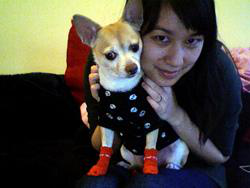

In [34]:
from PIL import Image
im = Image.open("n02085620_7.jpg")
im

In [52]:
from torchvision.transforms import ToTensor, ToPILImage
import numpy as np
tim = ToTensor()(im)
tim.shape

torch.Size([3, 188, 250])

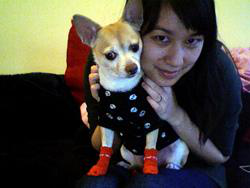

In [36]:
ToPILImage()(tim)

In [20]:
f = open('dogs', "rb")

In [21]:
import pickle

X = pickle.load(f, encoding="latin-1")

In [22]:
data, labels = X

In [23]:
data.shape

(20580, 128, 128, 3)

In [27]:
labels.shape

(20580, 120)

In [28]:
type(data)

numpy.ndarray

In [57]:
x_train, x_valid, y_train, y_valid = train_test_split(data, labels, test_size=0.20, random_state=123)

In [61]:
x_train[0].shape

(128, 128, 3)

In [63]:
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)

In [156]:
x_train.shape

torch.Size([16464, 128, 128, 3])

In [163]:
a = x_train[0].view(16384, 3)
a = torch.transpose(a, 0, 1)
a = a.view(3, 128, 128)
a.shape

torch.Size([3, 128, 128])

In [ ]:
n, c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

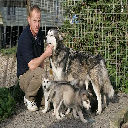

In [164]:
ToPILImage()(a)

In [202]:
x = torch.randn(2, 4, 3)
x

tensor([[[-0.3886,  1.3131,  0.0269],
         [ 0.0718,  1.4002, -0.4171],
         [ 0.4941,  0.3740, -1.4999],
         [-1.0730,  0.6493,  0.0508]],

        [[-0.3264, -0.9943,  1.5658],
         [ 1.7199, -0.8775,  0.5089],
         [ 1.2252, -0.7383,  1.0815],
         [ 0.5273,  0.4641, -0.6556]]])

In [219]:
#x = x.view(3, 4, 2)
xx = torch.transpose(x, 1, 2)
xx
#x.shape

tensor([[[-0.3886,  0.0718,  0.4941, -1.0730],
         [ 1.3131,  1.4002,  0.3740,  0.6493],
         [ 0.0269, -0.4171, -1.4999,  0.0508]],

        [[-0.3264,  1.7199,  1.2252,  0.5273],
         [-0.9943, -0.8775, -0.7383,  0.4641],
         [ 1.5658,  0.5089,  1.0815, -0.6556]]])

In [220]:
xx.shape

torch.Size([2, 3, 4])

In [192]:
a = data[11]
a = ToTensor()(a)

In [193]:
a

tensor([[[0.3216, 0.2941, 0.2392,  ..., 0.3451, 0.3725, 0.3686],
         [0.2941, 0.2902, 0.2392,  ..., 0.3569, 0.3843, 0.3725],
         [0.2980, 0.2902, 0.2157,  ..., 0.3137, 0.3333, 0.3333],
         ...,
         [0.3686, 0.3725, 0.3804,  ..., 0.2235, 0.2706, 0.3137],
         [0.4157, 0.3647, 0.3529,  ..., 0.2196, 0.2392, 0.2431],
         [0.2824, 0.3725, 0.3725,  ..., 0.1961, 0.2078, 0.2471]],

        [[0.5098, 0.5137, 0.4706,  ..., 0.5216, 0.5490, 0.5451],
         [0.4824, 0.5098, 0.4706,  ..., 0.5333, 0.5608, 0.5490],
         [0.4863, 0.5098, 0.4471,  ..., 0.4902, 0.5098, 0.5098],
         ...,
         [0.4431, 0.4392, 0.4353,  ..., 0.3725, 0.4196, 0.4627],
         [0.5020, 0.4392, 0.4196,  ..., 0.3686, 0.3882, 0.3922],
         [0.3686, 0.4588, 0.4392,  ..., 0.3529, 0.3647, 0.4000]],

        [[0.2667, 0.2745, 0.2588,  ..., 0.3922, 0.4196, 0.4157],
         [0.2392, 0.2706, 0.2588,  ..., 0.4039, 0.4314, 0.4196],
         [0.2431, 0.2706, 0.2353,  ..., 0.3608, 0.3804, 0.

In [198]:
a = torch.transpose(x_train[0], -3, 2)
a = torch.transpose(a, -2, 2)

In [199]:
a

tensor([[[0.4314, 0.2980, 0.2745,  ..., 0.1098, 0.6353, 0.1137],
         [0.2314, 0.2549, 0.2627,  ..., 0.3216, 0.5569, 0.2196],
         [0.3333, 0.2549, 0.1922,  ..., 0.3255, 0.3961, 0.2902],
         ...,
         [0.4157, 0.3020, 0.3647,  ..., 0.5137, 0.5333, 0.5176],
         [0.1647, 0.4275, 0.2824,  ..., 0.4431, 0.4314, 0.4902],
         [0.2235, 0.3059, 0.4980,  ..., 0.4196, 0.4039, 0.3765]],

        [[0.4392, 0.3059, 0.2824,  ..., 0.1725, 0.6824, 0.1137],
         [0.2392, 0.2627, 0.2706,  ..., 0.3725, 0.5961, 0.2392],
         [0.3412, 0.2627, 0.2000,  ..., 0.3569, 0.4118, 0.3412],
         ...,
         [0.4118, 0.3020, 0.3490,  ..., 0.4510, 0.4745, 0.4314],
         [0.1608, 0.4275, 0.2667,  ..., 0.3725, 0.3647, 0.4000],
         [0.2196, 0.3059, 0.4824,  ..., 0.3529, 0.3451, 0.3059]],

        [[0.4275, 0.2941, 0.2706,  ..., 0.0000, 0.5961, 0.0118],
         [0.2275, 0.2510, 0.2588,  ..., 0.2000, 0.5020, 0.1490],
         [0.3294, 0.2510, 0.1882,  ..., 0.2039, 0.3216, 0.

In [200]:
a.shape

torch.Size([3, 128, 128])

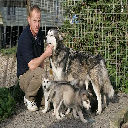

In [201]:
ToPILImage()(a)

In [146]:
for i in data:
    ((x_train, y_train), (x_valid, y_valid), _) = data[]

SyntaxError: invalid syntax (<ipython-input-146-f68614dd8d7a>, line 2)

Scikit learn split
Poprobui tolko odnu papku s photo raspakovat’
Matfile S label raspakui

In [49]:
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
import numpy as np
import random

import tarfile
import io
import os
import pandas as pd

from torch.utils.data import Dataset
import torch

class YourDataset(Dataset):
    def __init__(self, txt_path='filelist.txt', img_dir='data.tar', transform=None):
        """
        Initialize data set as a list of IDs corresponding to each item of data set

        :param img_dir: path to image files as a uncompressed tar archive
        :param txt_path: a text file containing names of all of images line by line
        :param transform: apply some transforms like cropping, rotating, etc on input image
        """

        df = pd.read_csv(txt_path, sep=' ', index_col=0)
        self.img_names = df.index.values
        self.txt_path = txt_path
        self.img_dir = img_dir
        self.transform = transform
        self.to_tensor = ToTensor()
        self.to_pil = ToPILImage()
        self.tf = tarfile.open(self.img_dir)

    def get_image_from_tar(self, name):
        """
        Gets a image by a name gathered from file list csv file

        :param name: name of targeted image
        :return: a PIL image
        """
        image = self.tf.extractfile(name)
        image = image.read()
        image = Image.open(io.BytesIO(image))
        return image

    def __len__(self):
        """
        Return the length of data set using list of IDs

        :return: number of samples in data set
        """
        return len(self.img_names)

    def __getitem__(self, index):
        """
        Generate one item of data set.

        :param index: index of item in IDs list

        :return: a sample of data as a dict
        """

        if index == (self.__len__() - 1) :  # close tarfile opened in __init__
            self.tf.close()

        
        image = self.get_image_from_tar(self.img_names[index])
       
        if self.transform is not None:
            image = self.transform(image)

        sample = {'X': image}

        return sample

In [ ]:
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
import numpy as np
import random

import tarfile
import io
import os
import pandas as pd

from torch.utils.data import Dataset
import torch

class YourDataset(Dataset):
    def __init__(self, txt_path='filelist.txt', img_dir='data.tar', transform=None):
        """
        Initialize data set as a list of IDs corresponding to each item of data set

        :param img_dir: path to image files as a uncompressed tar archive
        :param txt_path: a text file containing names of all of images line by line
        :param transform: apply some transforms like cropping, rotating, etc on input image
        """

        df = pd.read_csv(txt_path, sep=' ', index_col=0)
        self.img_names = df.index.values
        self.txt_path = txt_path
        self.img_dir = img_dir
        self.transform = transform
        self.to_tensor = ToTensor()
        self.to_pil = ToPILImage()
        self.tf = tarfile.open(self.img_dir)

    def get_image_from_tar(self, name):
        """
        Gets a image by a name gathered from file list csv file

        :param name: name of targeted image
        :return: a PIL image
        """
        image = self.tf.extractfile(name)
        image = image.read()
        image = Image.open(io.BytesIO(image))
        return image

    def __len__(self):
        """
        Return the length of data set using list of IDs

        :return: number of samples in data set
        """
        return len(self.img_names)

    def __getitem__(self, index):
        """
        Generate one item of data set.

        :param index: index of item in IDs list

        :return: a sample of data as a dict
        """

        if index == (self.__len__() - 1) :  # close tarfile opened in __init__
            self.tf.close()

        
        image = self.get_image_from_tar(self.img_names[index])
       
        if self.transform is not None:
            image = self.transform(image)

        sample = {'X': image}

        return sample